In [341]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('bmh')


In [342]:
df = pd.read_csv('AMZN_Daily_10year.csv')

In [343]:
# If we plan to predict the prices of the latest 503 days, then we will remove the data from these 50 days. Like we did for LSTM.

future_days = 503
df['Prediction']=df[['Close']].shift(-future_days)
df.head(5)

df = df.drop(['Open', 'Date', 'High', 'Low', 'Adj Close', 'Volume'],1)

/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_79243/1413416283.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Open', 'Date', 'High', 'Low', 'Adj Close', 'Volume'],1)


In [344]:
# Create the feature data set 'x' and convert it into a NumPy array and remove the last future_days rows.
x=np.array(df.drop(['Prediction'],1))[:-future_days]

# Create the target data set 'y' and convert it to a NumPy array and get all of the target values except the last 'fd' rows.
y = np.array(df['Prediction'])[:-future_days]

/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_79243/848003460.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(df.drop(['Prediction'],1))[:-future_days]


In [345]:
# Get the last x rows of the feature data set

xf  = df.drop(['Prediction'], 1)[:-future_days]
xf = xf.tail(future_days)
xf=np.array(xf)
xf

/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_79243/2197651386.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xf  = df.drop(['Prediction'], 1)[:-future_days]


array([[ 90.233002],
       [ 90.085503],
       [ 89.788498],
       [ 89.410004],
       [ 89.293999],
       [ 88.582497],
       [ 88.900002],
       [ 87.655502],
       [ 87.730003],
       [ 86.974503],
       [ 87.626503],
       [ 87.639503],
       [ 87.276497],
       [ 86.735497],
       [ 87.286003],
       [ 88.692001],
       [ 89.847   ],
       [ 90.925499],
       [ 90.040001],
       [ 89.080002],
       [ 88.498001],
       [ 88.0345  ],
       [ 87.024002],
       [ 87.580002],
       [ 87.475502],
       [ 86.960503],
       [ 87.435997],
       [ 88.016502],
       [ 88.046997],
       [ 88.460503],
       [ 89.532997],
       [ 89.2015  ],
       [ 89.613998],
       [ 89.324997],
       [ 89.650002],
       [ 89.460503],
       [ 93.438499],
       [ 93.489998],
       [ 92.344498],
       [ 92.391998],
       [ 94.900497],
       [ 93.748497],
       [ 95.143997],
       [ 95.343002],
       [ 94.598503],
       [ 95.052498],
       [ 94.157997],
       [ 94.5

In [346]:
# Split the data into 75% training and 25% testing.
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [347]:
# The fit() method is used to build a decision tree regressor from the training sets. 
#The values of x_train and y_train (training sets) are passed as arguments to the fit method().

tree = DecisionTreeRegressor().fit(x_train, y_train)

# The predict() method is used to predict the model for the future number of days sent as parameters.
tree_prediction=tree.predict(xf)
#print(tree_prediction)

/var/folders/jy/j8xvywpn7mz4ylrqrpy4_1fm0000gn/T/ipykernel_79243/2120073748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


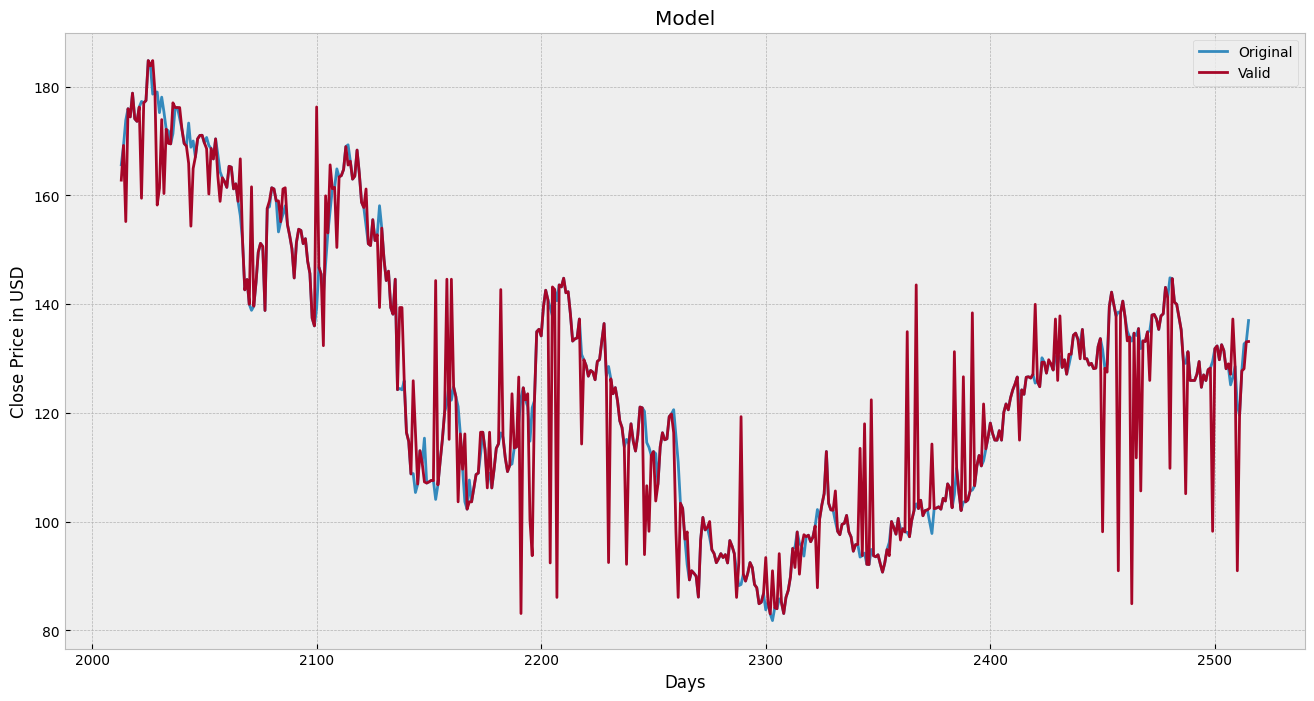

In [348]:
# visualize the model
predictions = tree_prediction
valid=df[x.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
#plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original','Valid', 'Predicted'])
plt.show()

In [335]:
predicted_prices = valid['Predictions']
actual_prices = valid['Close']

# RMSE
# Step 1: Calculate the squared differences
squared_diff = (predicted_prices - actual_prices) ** 2

# Step 2: Compute the mean of squared differences
mean_squared_diff = squared_diff.mean()

# Step 3: Take the square root to get RMSE
rmse = np.sqrt(mean_squared_diff)

print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 10.16411281993748


In [340]:
trials = [10.308, 9.3701, 8.6760, 8.3137, 8.0474, 10.3064, 9.5049, 7.9529, 9.0265, 9.57130,
          9.4871, 9.366, 10.1887, 9.0598, 9.7585, 8.528, 9.163, 9.095, 9.465, 9.836, 10.164]

sum(trials) / len(trials)

9.294680952380952

Average RMSE after 20 trials: 9.295